In [1]:
import requests
import pandas as pd

In [2]:
start='2022-03-02'
to='2022-04-01'
myurl='https://transparency.entsog.eu/api/v1/aggregateddata.xlsx?forceDownload=true&pointDirection=ee-lv------ee-tso-0001entryproduction,ee-lv------ee-tso-0001exittransmission,ee-lv------ee-tso-0001exitfinal%20consumers,ee-lv------ee-tso-0001entrytransmissionfi---------,ee-lv------ee-tso-0001exittransmissionfi---------,ee-lv------ee-tso-0001entrytransmission&from={}&to={}&indicator=Physical%20Flow&periodType=day&timezone=CET&limit=-1'.format(start,to)
response=requests.get(myurl)
print(response)

<Response [200]>


In [3]:
df=pd.read_excel(myurl)
print(df)

                                                    id  dataSet dataSetLabel  \
0    1AggregatesEEEE-LV------EE-TSO-0001entryTransm...        1   Aggregates   
1    1AggregatesEEEE-LV------EE-TSO-0001entryTransm...        1   Aggregates   
2    1AggregatesEEEE-LV------EE-TSO-0001exitFinal C...        1   Aggregates   
3    1AggregatesEEEE-LV------EE-TSO-0001exitTransmi...        1   Aggregates   
4    1AggregatesEEEE-LV------EE-TSO-0001exitTransmi...        1   Aggregates   
..                                                 ...      ...          ...   
150  1AggregatesEEEE-LV------EE-TSO-0001entryTransm...        1   Aggregates   
151  1AggregatesEEEE-LV------EE-TSO-0001entryTransm...        1   Aggregates   
152  1AggregatesEEEE-LV------EE-TSO-0001exitFinal C...        1   Aggregates   
153  1AggregatesEEEE-LV------EE-TSO-0001exitTransmi...        1   Aggregates   
154  1AggregatesEEEE-LV------EE-TSO-0001exitTransmi...        1   Aggregates   

         indicator periodType        pe

In [4]:
df_subset=df[['directionKey','day','value']]
print(df_subset)

    directionKey  day         value
0          entry    2  9.102758e+06
1          entry    2  1.906728e+07
2           exit    2  1.722078e+07
3           exit    2  0.000000e+00
4           exit    2  0.000000e+00
..           ...  ...           ...
150        entry    1  0.000000e+00
151        entry    1  0.000000e+00
152         exit    1  1.482176e+07
153         exit    1  0.000000e+00
154         exit    1  4.278864e+06

[155 rows x 3 columns]


In [5]:
values_by_entry=df_subset.pivot_table(index=['day','directionKey'])
print(values_by_entry)

                         value
day directionKey              
1   entry         0.000000e+00
    exit          6.366876e+06
2   entry         1.408502e+07
    exit          5.740259e+06
3   entry         1.802203e+07
...                        ...
29  exit          6.971326e+06
30  entry         1.957191e+07
    exit          6.093620e+06
31  entry         1.573947e+07
    exit          5.836568e+06

[62 rows x 1 columns]


<AxesSubplot:xlabel='day,directionKey'>

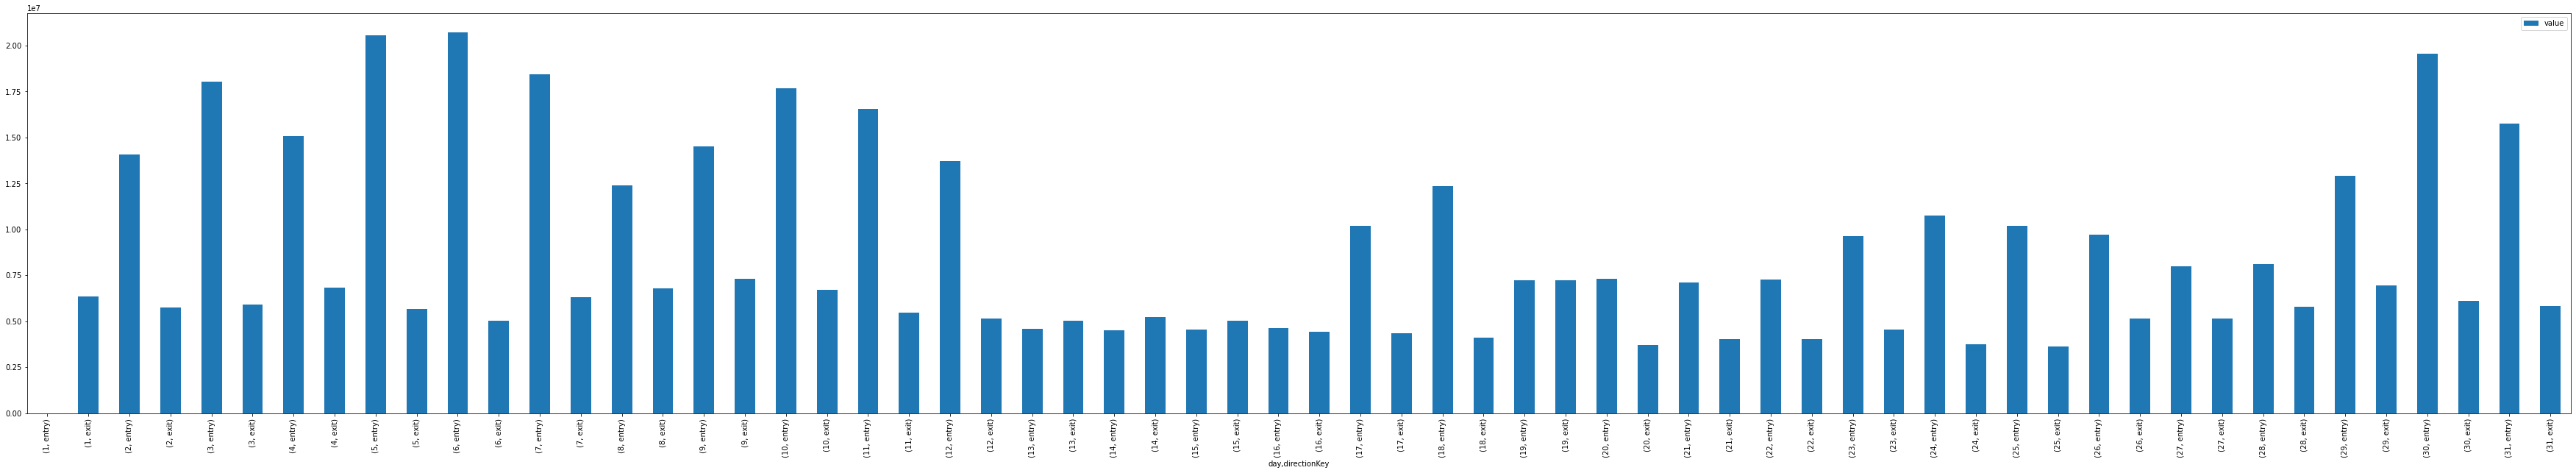

In [6]:
values_by_entry.plot(kind='bar',figsize=(62,10))